In [392]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [393]:
data = pd.read_csv("Insurance_Marketing-Customer-Value-Analysis (1).csv")

In [394]:
len(data.Customer.unique()), data.Customer.shape

(9134, (9134,))

In [395]:
data['to_date'] = pd.to_datetime(data['Effective To Date'],format='%m/%d/%Y')

In [396]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,to_date
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02-24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01-31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02-19
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01-20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-02-03


In [397]:
# data['to_date_year'] = pd.DatetimeIndex(data['to_date']).year
# data['to_date_month'] = pd.DatetimeIndex(data['to_date']).month
# data['to_date_day'] = pd.DatetimeIndex(data['to_date']).day
ref_date = pd.to_datetime('1/1/2011', format='%m/%d/%Y')      # Jan 1, 2011 set as reference date
data['num_days'] = data['to_date'].sub(ref_date)              # Calculating no of days remaining
data['num_days'] = data['num_days']/np.timedelta64(1, 'D')    # Converting num_days to float type
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,to_date,num_days
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02-24,54.0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01-31,30.0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02-19,49.0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01-20,19.0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-02-03,33.0


In [398]:
# year is always 2011 and we don't need effective and date time
# data.drop(['to_date_year', 'to_date', 'Effective To Date'], axis=1, inplace=True)
data.drop(['to_date', 'Effective To Date'], axis=1, inplace=True)

In [399]:
# kuch fayda nahi iska
data['customer_id'] = data['Customer'].apply(lambda x: x[:2])
data.drop(['Customer','customer_id'], axis=1,inplace=True)

In [400]:
data_copy = data    # To test some models on this form of the data.
data = pd.get_dummies(data, drop_first=True)

In [401]:
data_copy.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,num_days
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,54.0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,30.0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,49.0
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,19.0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,33.0


In [402]:
data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,num_days,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,54.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,49.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,19.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,33.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [403]:
cols_to_norm = ['Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies', 'Total Claim Amount']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [404]:
data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,num_days,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,54.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,49.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,19.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,33.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [422]:
X = (data.drop(['Customer Lifetime Value'], axis=1))
Y = (data['Customer Lifetime Value'])

# X = np.array(data.drop(['Customer Lifetime Value'], axis=1))
# Y = np.array(data['Customer Lifetime Value'])
# X = np.array(data[['Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception'
#                   ,'Total Claim Amount', 'num_days']])
# Y = np.array(data['Customer Lifetime Value'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [423]:
# X = data_copy.drop(['Customer Lifetime Value'], axis=1)
# Y = data_copy['Customer Lifetime Value']
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [424]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
print(type(X_train))

(7307, 51) (1827, 51)
(7307,) (1827,)
<class 'pandas.core.frame.DataFrame'>


### Random Forest Regressor

In [425]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score

# model = RandomForestRegressor(n_estimators = 500)
# model.fit(X_train, Y_train)

In [426]:
# val_predictions = model.predict(X_test)
# mean_absolute_error(Y_test,val_predictions)

In [427]:
# r2_score(Y_test, val_predictions)

### XGBoost

In [428]:
import xgboost
import matplotlib.pyplot as plt 
%matplotlib inline

In [429]:
model = xgboost.XGBRegressor()

In [430]:
model.fit(X_train, Y_train)

/home/shubham/.local/lib/python3.5/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:55:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [431]:
val_predictions = model.predict(X_test)
mean_absolute_error(Y_test,val_predictions)

1719.1685187404084

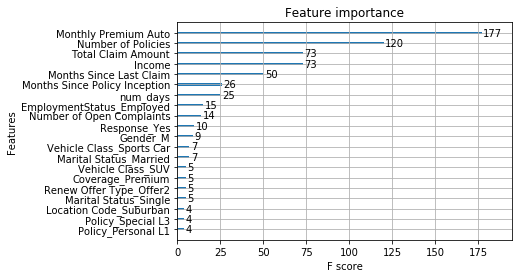

In [432]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20)

### Lasso Regression

In [433]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("MSE on test: " + str(mean_squared_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 3986.5867237790917
MSE on test: 43465652.00551141
R2 on test: 0.15659870160907352
R2 on train: 0.17139779722751958


### Ridge Regression

In [434]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("MSE on test: " + str(mean_squared_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 3988.57898745195
MSE on test: 43475173.44434113
R2 on test: 0.15641394897104755
R2 on train: 0.17133155323762173


### Linear Regression

In [435]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("MSE on test: " + str(mean_squared_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 3994.3616207744963
MSE on test: 43544387.1863937
R2 on test: 0.1550709354139006
R2 on train: 0.1714696975471407


### BayesianRidge

In [436]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("MSE on test: " + str(mean_squared_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 3981.265220799158
MSE on test: 43384251.07504282
R2 on test: 0.15817819362816776
R2 on train: 0.16968405548517151


### SVM

In [437]:
from sklearn import svm
model = svm.SVR()
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("MSE on test: " + str(mean_squared_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 4130.026368616081
MSE on test: 55992728.521259144
R2 on test: -0.08647490044075745
R2 on train: -0.10493904162860757


### Decision Tree

In [438]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("MSE on test: " + str(mean_squared_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 1814.3173518839628
MSE on test: 29493012.160181176
R2 on test: 0.42772180787252134
R2 on train: 1.0


### AdaBoost

In [439]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators = 15)  # Near optimal value: 15 ; falls sharply after 20
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("MSE on test: " + str(mean_squared_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 3011.015181908066
MSE on test: 22586142.1266706
R2 on test: 0.5617417267119205
R2 on train: 0.5759697569849639


### Random Forest

MAE on test: 1469.2174976834203
MSE on test: 16098883.957858786
R2 on test: 0.687619556909412
R2 on train: 0.9572342089640918
Feature ranking:
1. Feature 5 (0.471156)
2. Feature 1 (0.248198)
3. Feature 2 (0.039114)
4. Feature 3 (0.032847)
5. Feature 6 (0.032435)
6. Feature 7 (0.032342)
7. Feature 0 (0.028740)
8. Feature 17 (0.006001)
9. Feature 4 (0.005864)
10. Feature 23 (0.005743)
11. Feature 12 (0.004523)
12. Feature 26 (0.003956)
13. Feature 38 (0.003953)
14. Feature 49 (0.003906)
15. Feature 41 (0.003696)
16. Feature 25 (0.003594)
17. Feature 15 (0.003592)
18. Feature 42 (0.003415)
19. Feature 43 (0.003324)
20. Feature 33 (0.003314)


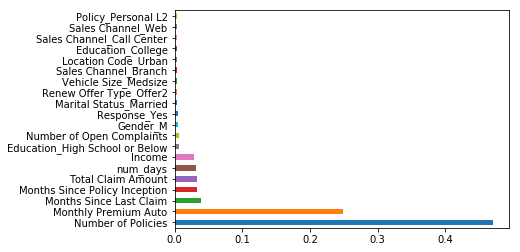

In [446]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 50)
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("MSE on test: " + str(mean_squared_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

importances = model.feature_importances_
#print(importances)
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(0,20):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(0,20), importances[indices][0:20],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [390]:
print(importances.shape)

(51,)


## Testing models on numerical data (without one-hot conversion)

In [350]:
cols_to_norm = ['Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies', 'Total Claim Amount']
data_copy[cols_to_norm] = data_copy[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
data_copy.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,num_days
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,0.562847,Suburban,Married,0.033755,0.914286,0.050505,0.0,0.000,Corporate Auto,Corporate L3,Offer1,Agent,0.132974,Two-Door Car,Medsize,54.0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0.000000,Suburban,Single,0.139241,0.371429,0.424242,0.0,0.875,Personal Auto,Personal L3,Offer3,Agent,0.391051,Four-Door Car,Medsize,30.0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,0.487763,Suburban,Married,0.198312,0.514286,0.383838,0.0,0.125,Personal Auto,Personal L3,Offer1,Agent,0.195764,Two-Door Car,Medsize,49.0
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0.000000,Suburban,Married,0.189873,0.514286,0.656566,0.0,0.750,Corporate Auto,Corporate L2,Offer1,Call Center,0.183117,SUV,Medsize,19.0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,0.438443,Rural,Single,0.050633,0.342857,0.444444,0.0,0.000,Personal Auto,Personal L1,Offer1,Agent,0.047710,Four-Door Car,Medsize,33.0


In [353]:
X = np.array(data_copy.drop(['Customer Lifetime Value'], axis=1))
# X = np.array(data_copy[['State','Coverage','EmploymentStatus','Income','Monthly Premium Auto',
#                         'Months Since Last Claim','Months Since Policy Inception','Number of Policies',
#                         'Policy Type','Policy','Renew Offer Type','Sales Channel','Total Claim Amount',
#                         'Vehicle Class','Vehicle Size','num_days']])
Y = np.array(data_copy['Customer Lifetime Value'])
print(X[0])
print(X.shape)
enc1 = LabelEncoder()
X[:,0] = enc1.fit_transform(X[:,0])

enc2 = LabelEncoder()
X[:,1] = enc2.fit_transform(X[:,1])

enc3 = LabelEncoder()
X[:,2] = enc2.fit_transform(X[:,2])

enc4 = LabelEncoder()
X[:,3] = enc2.fit_transform(X[:,3])

enc5 = LabelEncoder()
X[:,4] = enc2.fit_transform(X[:,4])

enc6 = LabelEncoder()
X[:,5] = enc2.fit_transform(X[:,5])

enc7 = LabelEncoder()
X[:,7] = enc2.fit_transform(X[:,7])

enc8 = LabelEncoder()
X[:,8] = enc2.fit_transform(X[:,8])

enc9 = LabelEncoder()
X[:,14] = enc2.fit_transform(X[:,14])

enc10 = LabelEncoder()
X[:,15] = enc2.fit_transform(X[:,15])

enc11 = LabelEncoder()
X[:,16] = enc2.fit_transform(X[:,16])

enc12 = LabelEncoder()
X[:,17] = enc2.fit_transform(X[:,17])

enc13 = LabelEncoder()
X[:,19] = enc2.fit_transform(X[:,19])

enc14 = LabelEncoder()
X[:,20] = enc2.fit_transform(X[:,20])
print(X[0])
print(X.shape)


###----------- Use this for polynomial features----------------------------###
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(2)
# X = poly.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)# random_state=42)

['Washington' 'No' 'Basic' 'Bachelor' 'Employed' 'F' 0.5628469409187745
 'Suburban' 'Married' 0.03375527426160337 0.9142857142857143
 0.050505050505050504 0.0 0.0 'Corporate Auto' 'Corporate L3' 'Offer1'
 'Agent' 0.132973879858744 'Two-Door Car' 'Medsize' 54.0]
(9134, 22)
[4 0 0 0 1 0 0.5628469409187745 1 1 0.03375527426160337 0.9142857142857143
 0.050505050505050504 0.0 0.0 0 2 0 0 0.132973879858744 5 1 54.0]
(9134, 22)


In [354]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(7307, 22) (7307,)
(1827, 22) (1827,)


### Random Forest

In [355]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 1504.203618531504
R2 on test: 0.7115573234939256
R2 on train: 0.9569567977845921


### AdaBoost

In [304]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators = 15)  # Near optimal value: 15 ; falls sharply after 20
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 2886.1748219762508
R2 on test: 0.5213333073202517
R2 on train: 0.5917069293432751


### Decison Tree

In [310]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 1770.9577592813355
R2 on test: 0.349692650514303
R2 on train: 1.0


### Linear Regression

In [309]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("MAE on test: " + str(mean_absolute_error(Y_test,test_pred)))
print("R2 on test: " + str(r2_score(Y_test, test_pred)))
print("R2 on train: " + str(r2_score(Y_train, train_pred)))

MAE on test: 3858.1883440607703
R2 on test: 0.2104683373479015
R2 on train: 0.28289150262241747


## Flow of Model Selection
#### Linear models: 
        - Underfitting
        - Poor train as well as test scores
        - Need more complex model
#### SVM, Bayesian Ridge etc also giving poor results     

#### Decision Tree:
        - Overfitting on training set
        - Poor results on test set
        - Reguralization needed or train multiple trees (Random Forests)
#### Random Forest:
        - Fitting well on training data
        - Best performance on test data among all models